# Explore a GEDI L4A file

This is a simple python script to explore a GEDI L4B file. It opens a single file and then prints out the contents. To run a cell of code, click on the cell and press the **"> Run"** button above. You will need to run the code in the correct order, otherwaise it may through an error. To restart and run all the code in order, you can click on the "**kernel -> Restart & Run All**" button above.

Run the code below to load all the libraries you will need. The code to open and handle the data is stored within gediL4Areader.py

In [1]:
# this will load all the libraries and tools you need
import numpy as np
from sys import path
path.append("/geos/netdata/active_sensing/code_active/10_upscaling")
from gediL4Areader import gediL4A

## Open a GEDI file

The tools we have loaded can be run to open a GEDI L4A file. The GEDI data is stored in a HDF5 file, which is described [here](https://daac.ornl.gov/GEDI/guides/GEDI_L4A_AGB_Density.html). This effectively allows a whole file structure to be stored.. To do that and print out the contents, run the code below:

In [2]:
# filename to open
filename='/Users/dougal/data/teaching/active_sensing/10_fusion/gedi/L4A/subset.GEDI04_A_2020178113837_O08714_02_T00308_02_002_02_V002.h5'

# read the data
data=gediL4A(filename)

# print out some of the contents
data.printHeaders()

Found 97329 footprints
['ANCILLARY', 'BEAM0000', 'BEAM0001', 'BEAM0010', 'BEAM0011', 'BEAM0101', 'BEAM0110', 'BEAM1000', 'BEAM1011']


This shows that this file has 8 beams and some ancillary data. Note that because these files are subset, not all files will contain all beams. The numbers after the beam tell you which are power beams and which are coverage:

* **BEAM0000** is a Coverage beam
* **BEAM0001** is a Coverage beam 
* **BEAM0010** is a Coverage beam 
* **BEAM0011** is a Coverage beam 
* **BEAM0101** is a Full power beam 
* **BEAM0110** is a Full power beam 
* **BEAM1000** is a Full power beam 
* **BEAM1011** is a Full power beam

The python code has read the following variables:

* **lat** - latitude (EPSG:4326)
* **lon** - longitude (EPSG:4326)
* **agbd** - aboveground biomass density (Mg/ha)
* **quality** - a quality flag. 0 for bad quality, 1 for good
* **sensitivity** - beam sensitivity as a fraction (0-1)


For this example, the poor quality data (quality==0) data will is filtered out by the code below

In [3]:
# filter out poor quality data
data.filterQuality()

Filtered 68206 from 97329


Now let's plot the location of the footprints. What do you notice about the data?

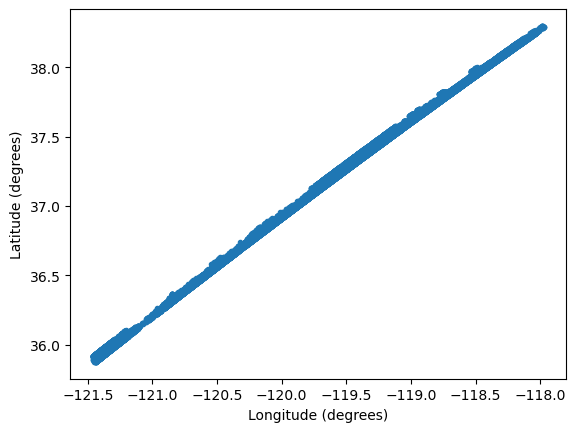

In [4]:
data.plotCoords()

Let's make a histogram of the biomass and the beam sensitivity.

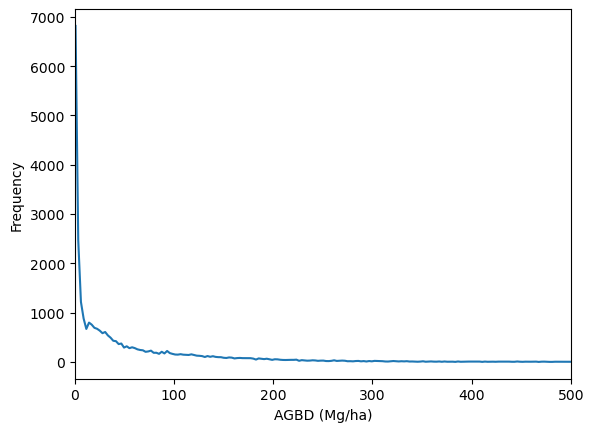

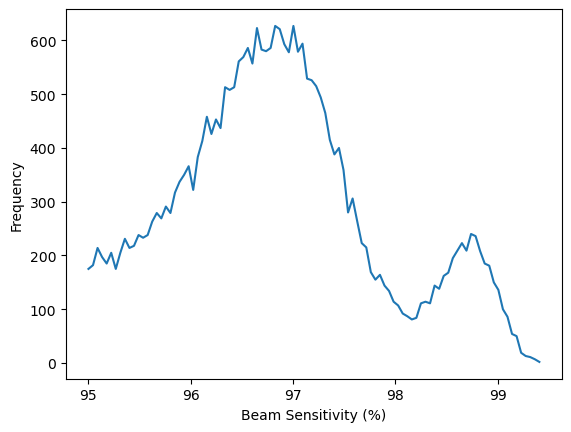

In [5]:
data.plotHistogram()